# Data Analyst Intern Assignment: Zylentrix 

### Integrating Dataset & Importing necessary libraries

In [70]:
import pandas as pd # Used for data manipulation and analysis.
import plotly.express as px # Used interactive visualizations.
import seaborn as sns # Used for statistical data visualization.
import matplotlib.pyplot as plt # Provides static visualizations.

In [71]:
# Loading the Dataset
students = pd.read_csv("D:/Zylentrix/students.csv")
course_activity = pd.read_csv("D:/Zylentrix/course_activity.csv")
feedback = pd.read_csv("D:/Zylentrix/feedback.csv")

In [72]:
students.head(2)

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023


In [73]:
course_activity.head(2)

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87


In [74]:
feedback.head(2)

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples


In [75]:
# Joining the table to make a final table
merged_data = pd.merge(course_activity, feedback, on=["Student_ID", "Course_ID"]) # Merge course_activity with feedback
final_data = pd.merge(merged_data, students, on="Student_ID") # Merge the intermediate merged_data with students

In [76]:
# Preview the Data
final_data.head(5) 

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Rating,Feedback_Text,Name,Age,Gender,Location,Enrolment_Date
0,S002,PY202,03/02/2024,45,32.20,3,Well structured,Student_2,32,Other,Chennai,27/02/2023
1,S002,PY202,06/03/2024,136,18.18,3,Well structured,Student_2,32,Other,Chennai,27/02/2023
2,S005,DM101,30/01/2024,27,91.49,4,Loved the examples,Student_5,24,Other,Delhi,06/05/2023
3,S006,DM101,27/03/2024,177,98.57,1,Loved the examples,Student_6,28,Other,Delhi,25/04/2023
4,S006,DM101,08/01/2024,113,75.54,1,Loved the examples,Student_6,28,Other,Delhi,25/04/2023


In [9]:
final_data.to_csv("D:/Zylentrix/final_data.csv", index=False) # Saves the dataframe as a CSV file.

### Data Cleaning & Preparation
Before analysis, clean and prepare the data:
* Ensure date columns are in the correct datetime format
* Handle missing values (if any)
* Filter relevant columns for analysis

In [10]:
# Provides a summary of the dataframe's structure and contents
final_data.info() # Here we need to change data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             122 non-null    object 
 1   Course_ID              122 non-null    object 
 2   Date                   122 non-null    object 
 3   Time_Spent_Minutes     122 non-null    int64  
 4   Completion_Percentage  122 non-null    float64
 5   Rating                 122 non-null    int64  
 6   Feedback_Text          122 non-null    object 
 7   Name                   122 non-null    object 
 8   Age                    122 non-null    int64  
 9   Gender                 122 non-null    object 
 10  Location               122 non-null    object 
 11  Enrolment_Date         122 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 11.6+ KB


In [11]:
# provides a statistical summary of all numeric columns in your dataset example mean, minimum, maximum
final_data.describe()

,Time_Spent_Minutes,Completion_Percentage,Rating,Age
count,122.000000,122.000000,122.000000,122.000000
mean,100.967213,57.383852,3.008197,25.860656
std,46.815081,26.639069,1.513006,4.954863
min,10.000000,11.250000,1.000000,18.000000
25%,67.750000,35.040000,1.000000,21.000000
50%,98.500000,55.655000,3.000000,25.500000
75%,138.750000,79.520000,4.000000,30.000000
max,178.000000,100.000000,5.000000,34.000000


In [12]:
final_data.isnull().sum() # check for null value

Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
Rating                   0
Feedback_Text            0
Name                     0
Age                      0
Gender                   0
Location                 0
Enrolment_Date           0
dtype: int64

In [14]:
final_data.duplicated() # Check for duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
117    False
118    False
119    False
120    False
121    False
Length: 122, dtype: bool

In [16]:
# pd.to_datetime(): Converts strings or other formats to datetime objects in pandas.
# dayfirst=True: Specifies that the day comes first in the date (e.g., DD/MM/YYYY).
final_data["Date"] = pd.to_datetime(final_data["Date"], dayfirst=True) 
final_data["Enrolment_Date"] = pd.to_datetime(final_data["Enrolment_Date"], dayfirst=True) 

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Student_ID             122 non-null    object        
 1   Course_ID              122 non-null    object        
 2   Date                   122 non-null    datetime64[ns]
 3   Time_Spent_Minutes     122 non-null    int64         
 4   Completion_Percentage  122 non-null    float64       
 5   Rating                 122 non-null    int64         
 6   Feedback_Text          122 non-null    object        
 7   Name                   122 non-null    object        
 8   Age                    122 non-null    int64         
 9   Gender                 122 non-null    object        
 10  Location               122 non-null    object        
 11  Enrolment_Date         122 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usa

### Exploratory Data Analysis (EDA)
* Analyzing trends over time
* Visualizing feedback ratings and correlations

In [25]:
# What is the overall average completion rate across courses?
average_completion = final_data["Completion_Percentage"].mean() # calculates the overall average completion rate in the final_data dataframe
print(f"Overall Average Completion Rate: {average_completion:.2f}%")

Overall Average Completion Rate: 57.38%


In [26]:
# Which course has the highest and lowest average engagement time?

# Analyzing Engagement Levels Across Courses
# Calculate Average Engagement: Group data by `Course_ID` and compute the mean time spent for each course.
average_engagement = final_data.groupby("Course_ID")["Time_Spent_Minutes"].mean()

# Identify Highest Engagement:** Determine the course with the maximum average time spent (`idxmax` and `max`).
highest_engagement_course = average_engagement.idxmax()
highest_engagement_time = average_engagement.max()

# Identify Lowest Engagement:** Determine the course with the minimum average time spent (`idxmin` and `min`).
lowest_engagement_course = average_engagement.idxmin()
lowest_engagement_time = average_engagement.min()

# Display Results: Use formatted print statements to output the course IDs and their respective engagement times.
print(f"Highest Engagement: Course {highest_engagement_course} with {highest_engagement_time:.2f} minutes")
print(f"Lowest Engagement: Course {lowest_engagement_course} with {lowest_engagement_time:.2f} minutes")

Highest Engagement: Course UX303 with 115.35 minutes
Lowest Engagement: Course PY202 with 85.95 minutes


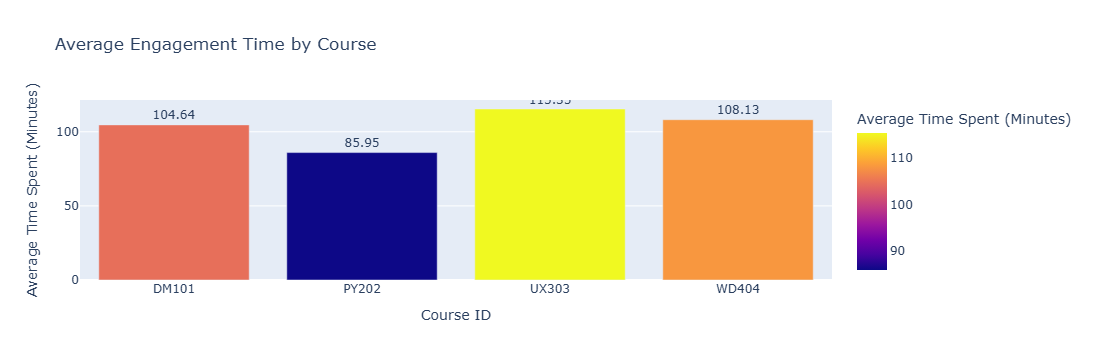

In [30]:
# Calculate Average Engagement: Group data by `Course_ID` and compute the mean time spent for each course
average_engagement = final_data.groupby("Course_ID")["Time_Spent_Minutes"].mean().reset_index()

# Create a Bar Chart: Generate an interactive bar chart to visualize engagement time for each course
fig = px.bar(
    average_engagement,
    x="Course_ID",  # Courses displayed on the x-axis
    y="Time_Spent_Minutes",  # Average engagement time on the y-axis
    title="Average Engagement Time by Course",  # Title of the chart
    labels={"Course_ID": "Course ID", "Time_Spent_Minutes": "Average Time Spent (Minutes)"},  # Labels for axes
    color="Time_Spent_Minutes",  # Color intensity based on engagement time
    text="Time_Spent_Minutes"  # Display engagement time directly on the bars
)

# Customize Text Formatting: Adjust text formatting for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Customize Layout: Add axis labels and hide the legend
fig.update_layout(
    xaxis_title="Course ID",  # Label for x-axis
    yaxis_title="Average Time Spent (Minutes)",  # Label for y-axis
    showlegend=False  # Hide the legend for simplicity
)

# Display Chart: Render the bar chart as an interactive visualization
fig.show()

In [31]:
# How does engagement differ by age group ?

# Group data by `Age` and calculate the average engagement metrics
# Specifically, calculate the mean of `Time_Spent_Minutes` and `Completion_Percentage` for each age group
engagement_by_age = final_data.groupby("Age")[["Time_Spent_Minutes", "Completion_Percentage"]].mean()

# Display the resulting dataframe showing average engagement and completion percentage by age
print(engagement_by_age)

     Time_Spent_Minutes  Completion_Percentage
Age                                           
18            98.500000              43.150000
19           100.400000              60.885000
20            76.200000              54.620000
21           128.142857              41.055714
22           124.333333              50.698333
23           100.250000              47.525000
24            86.000000              62.655000
25           116.333333              53.660833
26           111.600000              37.090000
27           110.000000              50.426667
28           109.333333              68.443333
29            77.928571              69.682143
30           135.500000              59.892500
31            90.400000              55.592000
32           107.000000              63.433571
33           111.500000              68.831667
34            52.250000              60.952500


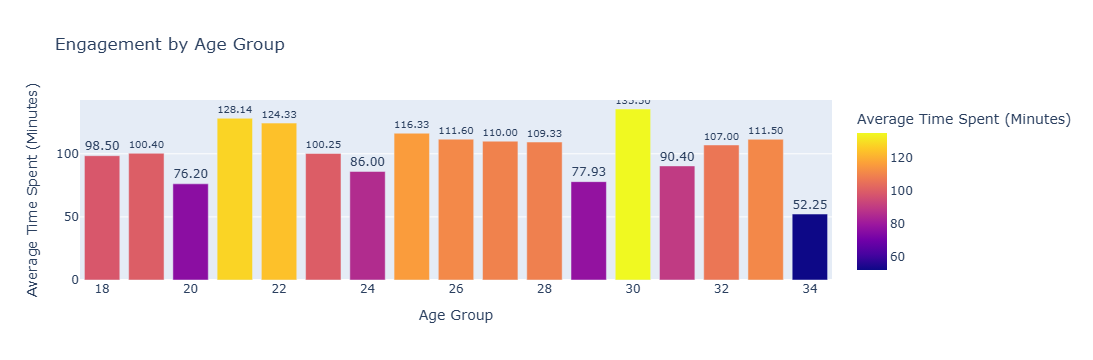

In [34]:
# Group data by `Age` and calculate the average engagement time (Time_Spent_Minutes) for each age group
engagement_by_age = final_data.groupby("Age")["Time_Spent_Minutes"].mean().reset_index()

# Create a Bar Chart: Generate an interactive bar chart to visualize engagement by age group
fig = px.bar(
    engagement_by_age,  # Data source
    x="Age",  # Age groups displayed on the x-axis
    y="Time_Spent_Minutes",  # Average engagement time on the y-axis
    title="Engagement by Age Group",  # Title of the chart
    labels={"Age": "Age Group", "Time_Spent_Minutes": "Average Time Spent (Minutes)"},  # Labels for axes
    color="Time_Spent_Minutes",  # Color intensity based on average time spent
    text="Time_Spent_Minutes"  # Display average time spent on top of the bars
)

# Customize Text Formatting: Format the text above the bars to two decimal places and position it outside the bars
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Customize Layout: Set axis titles and hide the legend
fig.update_layout(
    xaxis_title="Age Group",  # Label for the x-axis
    yaxis_title="Average Time Spent (Minutes)",  # Label for the y-axis
    showlegend=False  # Hide the legend for simplicity
)

# Display Chart: Render the interactive bar chart
fig.show()

In [32]:
# How does engagement differ by location ?

# Group data by `Location` and calculate the average engagement metrics
# Specifically, compute the mean values for `Time_Spent_Minutes` (engagement) and `Completion_Percentage` (completion rates) for each location
engagement_by_location = final_data.groupby("Location")[["Time_Spent_Minutes", "Completion_Percentage"]].mean()

# Display the resulting dataframe showing average engagement and completion percentage by location
print(engagement_by_location)

           Time_Spent_Minutes  Completion_Percentage
Location                                            
Bangalore          110.892857              52.658571
Chennai             89.354839              56.534839
Delhi              104.971429              58.125714
Kolkata            106.307692              58.738462
Mumbai              92.466667              65.054000


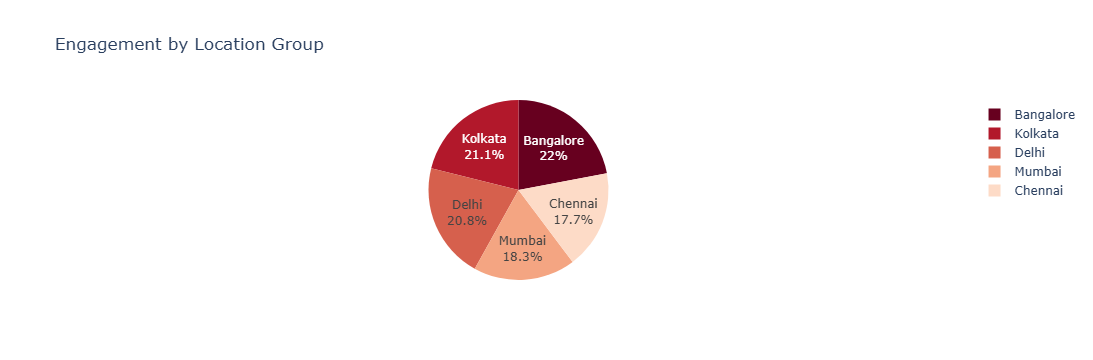

In [35]:
# Group data by `Location` and calculate the average engagement time
# Compute the mean of `Time_Spent_Minutes` for each location and reset the index for further visualization
engagement_by_location = final_data.groupby("Location")["Time_Spent_Minutes"].mean().reset_index()

# Create an Interactive Pie Chart: Use Plotly to display engagement by location as a pie chart
fig = px.pie(
    engagement_by_location,  # Data source for the pie chart
    values="Time_Spent_Minutes",  # Values represent average engagement time
    names="Location",  # Each slice corresponds to a unique location
    title="Engagement by Location Group",  # Title for the chart
    color_discrete_sequence=px.colors.sequential.RdBu,  # Apply a sequential color palette for visual appeal
)

# Customize Pie Chart Traces:
# - Add percentages and labels for each slice to display inside the chart
# - Configure hover information to show label, percentage, and value
fig.update_traces(
    textinfo="percent+label",  # Display percentage and labels inside the chart
    hoverinfo="label+percent+value"  # Show detailed info when hovering
)

# Display the Pie Chart: Render the interactive visualization
fig.show()

In [36]:
# What is the average feedback rating per course?

# Group data by `Course_ID` and calculate the average feedback ratings
# Specifically, compute the mean value of the `Rating` column for each course
average_feedback = final_data.groupby("Course_ID")["Rating"].mean()

# Display the resulting dataframe showing average feedback ratings for each course
print(average_feedback)

Course_ID
DM101    3.113636
PY202    3.236842
UX303    2.764706
WD404    2.608696
Name: Rating, dtype: float64


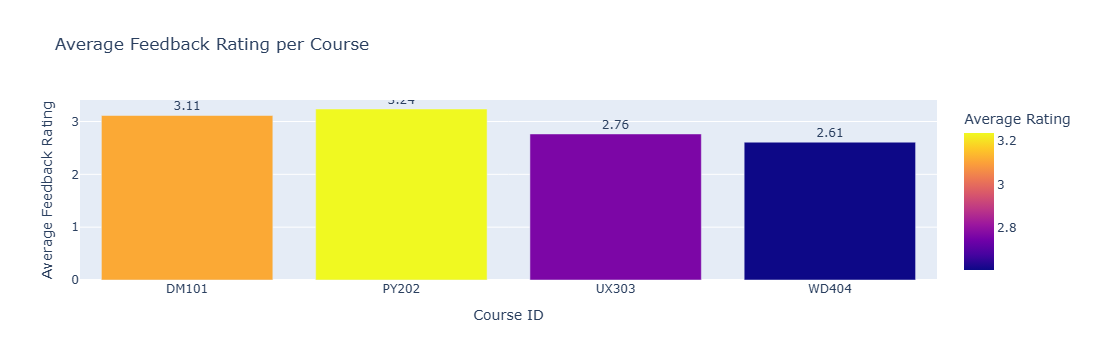

In [37]:
# Calculate Average Feedback Rating: Group the data by `Course_ID` and compute the mean value of `Rating`
average_feedback = final_data.groupby("Course_ID")["Rating"].mean().reset_index()

# Create an Interactive Bar Chart: Use Plotly to visualize average feedback ratings for each course
fig = px.bar(
    average_feedback,  # Data source
    x="Course_ID",  # Courses displayed on the x-axis
    y="Rating",  # Average feedback ratings displayed on the y-axis
    title="Average Feedback Rating per Course",  # Title of the chart
    labels={"Course_ID": "Course ID", "Rating": "Average Rating"},  # Labels for the axes
    color="Rating",  # Use color intensity to represent the average feedback rating
    text="Rating"  # Display the feedback rating directly on the bars
)

# Customize Text on Bars: Format the text above bars to two decimal places and place it outside the bars
fig.update_traces(texttemplate='%{text:.2f}', textposition="outside")

# Customize Chart Layout: Add axis titles and hide the legend for a cleaner look
fig.update_layout(
    xaxis_title="Course ID",  # Label for the x-axis
    yaxis_title="Average Feedback Rating",  # Label for the y-axis
    showlegend=False  # Hide the legend for simplicity since it's redundant in this case
)

# Display the Bar Chart: Render the interactive visualization
fig.show()

In [40]:
# Is there a correlation between completion rate and feedback rating?

# Calculate Correlation: Find the Pearson correlation coefficient between `Completion_Percentage` and `Rating`
correlation = final_data["Completion_Percentage"].corr(final_data["Rating"])

# Display Result: Print the calculated correlation with two decimal places for precision
print(f"Correlation between Completion Rate and Feedback Rating: {correlation:.2f}")

# There is no significant correlation between Completion Percentage and Feedback Rating, as the correlation coefficient is -0.05.

Correlation between Completion Rate and Feedback Rating: -0.05


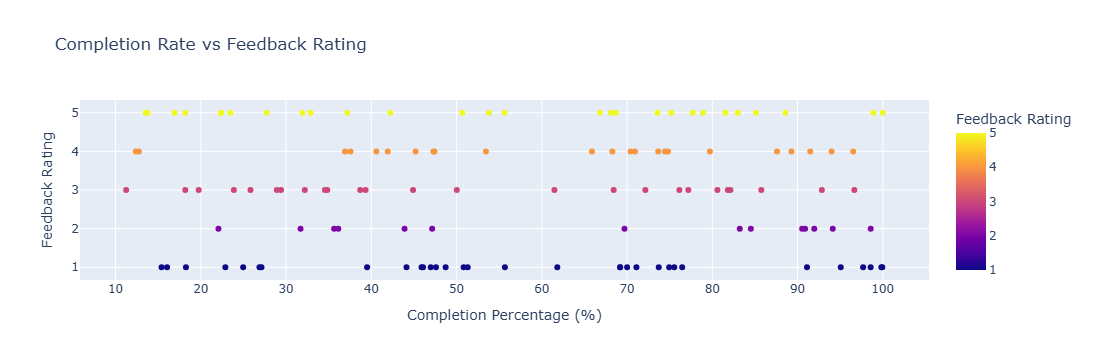

In [51]:
# Create an Interactive Scatter Plot: Visualize the relationship between completion rates and feedback ratings
fig = px.scatter(
    final_data,  # The dataset used for visualization
    x="Completion_Percentage",  # X-axis represents the completion percentage
    y="Rating",  # Y-axis represents the feedback rating
    title="Completion Rate vs Feedback Rating",  # Title of the scatter plot
    labels={"Completion_Percentage": "Completion Percentage (%)", "Rating": "Feedback Rating"},  # Axis labels
    color="Rating",  # Color the points based on feedback rating
    hover_data=["Course_ID", "Student_ID"]  # Include additional information (Course_ID, Student_ID) on hover
)

# Customize Layout:
# - Set descriptive axis titles
fig.update_layout(
    xaxis_title="Completion Percentage (%)",  # Label for the x-axis
    yaxis_title="Feedback Rating"  # Label for the y-axis
)

# Display the Scatter Plot: Render the interactive visualization
fig.show()
# Dataset includes non-numeric columns (e.g., S002, which is Student_ID). 
# The .corr() method can only calculate correlations for numeric columns, 
# so we using scatter plot not using heatmap or we can exclude non numeric column & use heatmap.

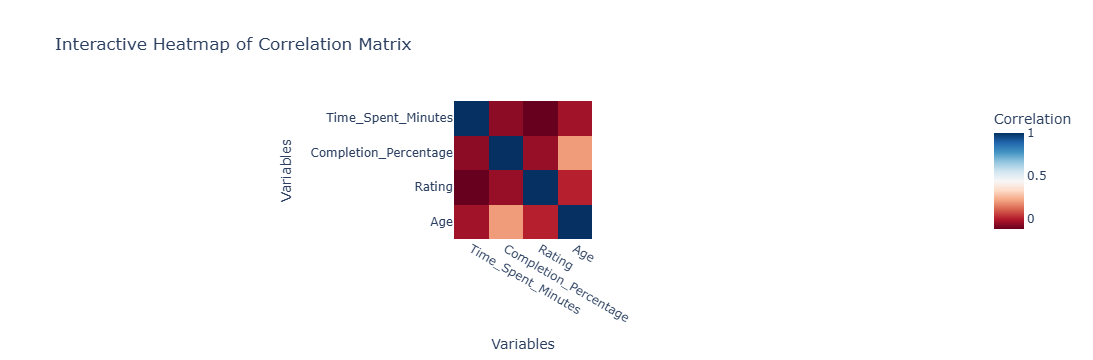

In [52]:
# Select Numeric Data: Extract only columns with numerical data types (`float64` and `int64`) for correlation analysis
numeric_data = final_data.select_dtypes(include=["float64", "int64"])

# Compute Correlation Matrix: Calculate the Pearson correlation coefficient between numeric variables
correlation_matrix = numeric_data.corr()

# Create Interactive Heatmap: Use Plotly to visualize the correlation matrix as a heatmap
fig = px.imshow(
    correlation_matrix,  # Data source (correlation matrix)
    labels=dict(color="Correlation"),  # Label for the color bar
    x=correlation_matrix.columns,  # Variable names on the x-axis
    y=correlation_matrix.columns,  # Variable names on the y-axis
    title="Interactive Heatmap of Correlation Matrix",  # Title of the heatmap
    color_continuous_scale="RdBu"  # Color scale from red to blue for positive/negative correlations
)

# Customize Layout: Add descriptive axis labels and adjust font size for readability
fig.update_layout(
    xaxis_title="Variables",  # Label for x-axis
    yaxis_title="Variables",  # Label for y-axis
    font=dict(size=12),  # Adjust font size for better presentation
)

# Display Heatmap: Render the interactive visualization to analyze correlations
fig.show()

In [47]:
# Identify top 3 student segments based on engagement and satisfaction ?

# Group Data: Aggregate data by `Location` and `Age`
# Calculate the mean values for `Time_Spent_Minutes` (engagement) and `Rating` (feedback) for each segment
segments = final_data.groupby(["Location", "Age"])[["Time_Spent_Minutes", "Rating"]].mean()

# Sort Segments: Sort the aggregated data by `Time_Spent_Minutes` and `Rating` in descending order
# Select the top 4 segments with the highest values
top_segments = segments.sort_values(by=["Time_Spent_Minutes", "Rating"], ascending=False).head(4)

# Display Results: Print the top 4 segments along with their corresponding engagement and feedback scores
print(top_segments)

               Time_Spent_Minutes  Rating
Location  Age                            
Bangalore 24                174.0     4.0
          30                173.0     4.0
Delhi     30                167.0     1.0
Mumbai    25                160.0     5.0


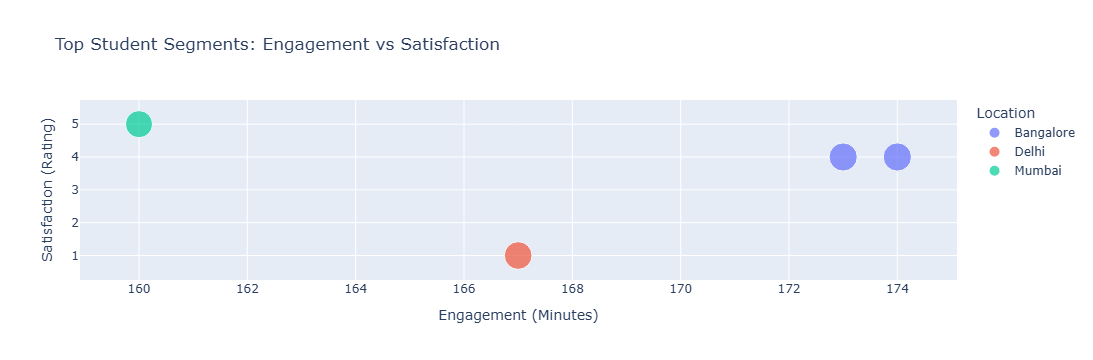

In [48]:
# Group Data: Aggregate metrics by `Location` and `Age` to analyze student segments
# Calculate mean values for `Time_Spent_Minutes` (engagement) and `Rating` (satisfaction), and reset the index
top_segments = final_data.groupby(["Location", "Age"])[["Time_Spent_Minutes", "Rating"]].mean().reset_index()

# Sort Segments: Sort the grouped data by engagement (`Time_Spent_Minutes`) and satisfaction (`Rating`)
# Select the top 4 segments based on descending order of these metrics
top_segments = top_segments.sort_values(by=["Time_Spent_Minutes", "Rating"], ascending=False).head(4)

# Create an Interactive Bubble Chart: Visualize the top student segments based on engagement and satisfaction
fig = px.scatter(
    top_segments,  # Data source
    x="Time_Spent_Minutes",  # Engagement time represented on the x-axis
    y="Rating",  # Satisfaction rating represented on the y-axis
    size="Time_Spent_Minutes",  # Bubble size corresponds to engagement time
    color="Location",  # Different locations represented by distinct bubble colors
    hover_name="Age",  # Show the age group on hover for more information
    title="Top Student Segments: Engagement vs Satisfaction",  # Title of the visualization
    labels={"Time_Spent_Minutes": "Engagement (Minutes)", "Rating": "Satisfaction (Rating)"}  # Axis labels
)

# Customize Layout: Add descriptive axis titles for clarity
fig.update_layout(
    xaxis_title="Engagement (Minutes)",  # Label for the x-axis
    yaxis_title="Satisfaction (Rating)",  # Label for the y-axis
)

# Display the Bubble Chart: Render the interactive visualization
fig.show()

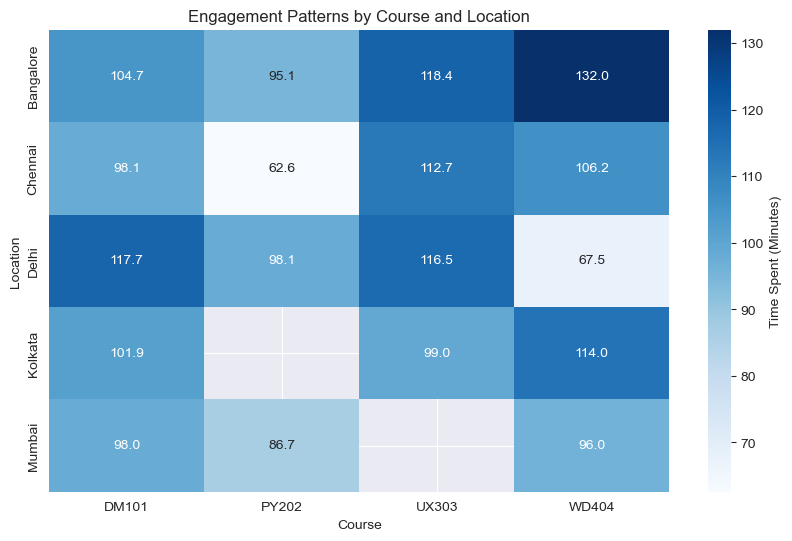

In [68]:
# Group Data: Aggregate engagement time by `Course_ID` and `Location`
# Calculate the mean value of `Time_Spent_Minutes` for each course-location pair
engagement_patterns = final_data.groupby(["Course_ID", "Location"])["Time_Spent_Minutes"].mean().reset_index()

# Pivot Data: Transform the aggregated data into a pivot table for heatmap visualization
# Set `Location` as the index, `Course_ID` as columns, and average engagement time as values
engagement_pivot = engagement_patterns.pivot(index="Location", columns="Course_ID", values="Time_Spent_Minutes")

# Create Heatmap: Visualize the engagement patterns using Seaborn's heatmap
plt.figure(figsize=(10, 6))  # Set figure size for the heatmap
sns.heatmap(
    engagement_pivot,  # Input pivot table for the heatmap
    annot=True,  # Annotate heatmap cells with the actual values
    fmt=".1f",  # Format values to one decimal place
    cmap="Blues",  # Use a blue color scheme for the heatmap
    cbar_kws={'label': 'Time Spent (Minutes)'}  # Add a label to the color bar
)

# Add Titles and Labels: Provide context for the heatmap
plt.title("Engagement Patterns by Course and Location")  # Title of the heatmap
plt.xlabel("Course")  # Label for the x-axis
plt.ylabel("Location")  # Label for the y-axis

# Display Heatmap: Render the heatmap visualization
plt.show()

#### Calculate Average Completion Percentage Over Time:

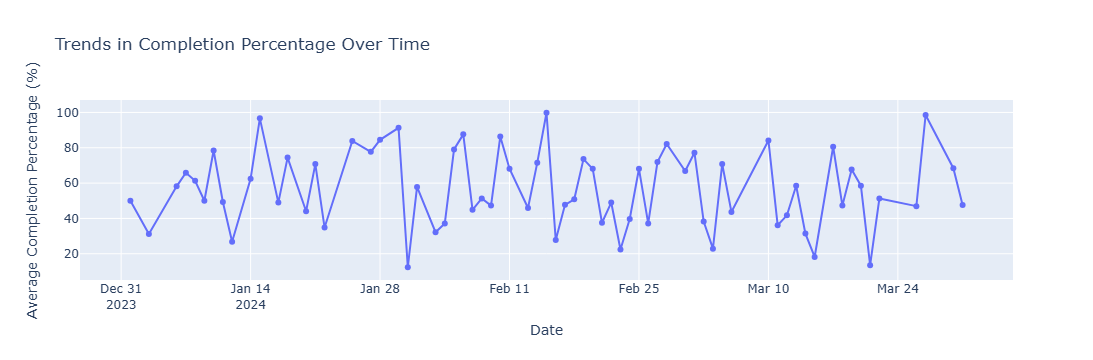

In [69]:
# Convert Date Column to Datetime Format: Ensure the `Date` column is properly formatted for time-based analysis
final_data["Date"] = pd.to_datetime(final_data["Date"])

# Group the data by `Date` and compute the mean completion percentage for each date
trends_over_time = final_data.groupby("Date")["Completion_Percentage"].mean().reset_index()

# Create an Interactive Line Chart: Use Plotly to visualize trends in completion percentage over time
fig = px.line(
    trends_over_time,  # Data source
    x="Date",  # Dates on the x-axis
    y="Completion_Percentage",  # Average completion percentage on the y-axis
    title="Trends in Completion Percentage Over Time",  # Title of the chart
    labels={"Date": "Date", "Completion_Percentage": "Completion Percentage (%)"},  # Axis labels
    markers=True  # Add markers to highlight individual data points
)

# Customize Layout: Add labels and enable unified hover tooltip
fig.update_layout(
    xaxis_title="Date",  # Label for the x-axis
    yaxis_title="Average Completion Percentage (%)",  # Label for the y-axis
    hovermode="x unified"  # Unified hover tooltip for the x-axis
)

# Display the Line Chart: Render the interactive visualization
fig.show()

# Conclusion:

## Top 5 Insights

**Overall Course Completion Rate is Low:**
* The average completion rate across all courses is 57.38%, suggesting a need for improvement in content delivery, student motivation, or
  course structure.
  
**Engagement Time Varies Significantly Across Courses:**
* Highest engagement: Course UX303 with 115.35 minutes average time spent.
* Lowest engagement: Course PY202 with 85.95 minutes.
* This indicates variability in how compelling or accessible each course is.

**Age Affects Engagement and Completion:**
* Students aged 30–34 show high engagement (e.g., 135.5 minutes at age 30), while younger students like those aged 20–22 spend less time and
  show lower completion.
* However, age 29–33 achieves both higher time spent and higher completion percentages, showing this group is highly committed.

**Location-Based Engagement Differences:**
* Most engaged city: Bangalore with 110.89 minutes average time spent.
* Highest completion rate: Mumbai at 65.05%, suggesting content may resonate better in certain regions or local support systems matter.

**Weak Link Between Feedback and Completion:**
* The correlation between feedback rating and completion rate is -0.05, indicating almost no linear relationship—suggesting other factors
  (like motivation, time availability) might impact completion more than feedback alone.


## Data-Driven Recommendations

**Redesign Courses with Low Engagement (e.g., PY202):**
* Conduct content reviews, improve interactivity, and offer quick assessments to keep learners motivated. Also, gather detailed qualitative
  feedback on these courses.
  
**Segmented Interventions Based on Demographics:**
* Create personalized learning strategies or marketing campaigns tailored to high-potential segments like 30–33 year-olds or students from Mumbai
  and Bangalore. These groups show strong engagement and satisfaction.

**Support Younger and Low-Completion Age Groups:**
* For students aged 18–22, consider mentorship, study groups, or bite-sized content to enhance clarity and retention. Early-stage drop-offs may
  be reduced with interactive orientation modules.